## Домашняя работа Сугян Анны Хачатуровны по курсу "Основы баз данных" 2025
### Для данного задания был выбран следующий датасет: [Game of Thrones Episode info](https://www.kaggle.com/datasets/bakar31/game-of-thronesgot) 
Датасет содержит следующие колонки:
- Номер серии в контексте всего сериала (INT)
- Номер серии в контексте сезона (INT)
- Номер сезона к которому относится серия (INT)
- Название серии (VARCHAR (15))
- Имя режиссера серии (VARCHAR (15))
- Имя сценариста серии (VARCHAR (15))
- Название романа, по которому адаптировалась серия (VARCHAR (15))
- Официальная дата выхода серии (DATE)
- Количество просмотров в США в миллионах (FLOAT)
- Оценка на IMDB (FLOAT)

In [1]:
import pandas as pd
import numpy as np
import mysql.connector
from getpass import getpass

Загружаем датасет

In [2]:
path = 'game of thrones.csv'
got = pd.read_csv(path)
got = got.fillna(0)
got

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1
...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,0,10.29,7.8
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,28-Apr-19,12.02,7.4
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,5-May-19,11.80,5.4
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,12-May-19,12.48,5.9


Как можно заметить, колонка, тип которой я обозначила как DATE, не совсем подходит под формат MySQL. Поэтому я ее обработаю

In [3]:
got['Original air date'] = pd.to_datetime(
    got['Original air date'],
    format='%d-%b-%y',
    errors='coerce'  # Невалидные значения → NaT
).dt.strftime('%Y-%m-%d')
got

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1
...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,NaN,10.29,7.8
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-04-28,12.02,7.4
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-05,11.80,5.4
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-12,12.48,5.9


Также у нас не будут приняты значения NaN, поэтому я меняю их на None

In [4]:
got = got.replace({np.nan: None}) # Значения NaN заменяем на None
got

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1
...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,None,10.29,7.8
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-04-28,12.02,7.4
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-05,11.80,5.4
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-12,12.48,5.9


### Схема базы данных
Для будущей базы данных я решила сделать следующие таблицы:
1) Эпизоды
2) Книги и сезоны
3) Режиссеры и сценаристы
4) Статистические данные (просмотры и оценка)

Теперь создаем новую базу данных 

In [6]:
mydb = mysql.connector.connect(
  host = "localhost",
  user = "root",
  password = getpass('Введите ваш пароль!')   
)

mycursor = mydb.cursor()
mycursor.execute("CREATE DATABASE got")

In [7]:
mydb = mysql.connector.connect(
    host = 'localhost',
    user = "root",
    password = getpass('Введите ваш пароль!')  
)

mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for database in mycursor:
  print(database) # Видим, что она создалась

('critics',)
('got',)
('information_schema',)
('kinopisk',)
('library',)
('ling',)
('linguistics',)
('mysql',)
('new_schema',)
('performance_schema',)
('sys',)
('world',)
('writers',)


Создаеи первую таблицу episodes

In [20]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)

mycursor = mydb.cursor()
mycursor.execute("""
CREATE TABLE episodes (
    episode_id INT AUTO_INCREMENT PRIMARY KEY,
    episode_title VARCHAR(255) UNIQUE,
    num_in_season INT,
    season INT,
    original_air_date DATE,
    us_viewers_millions FLOAT,
    imdb_rating FLOAT
)
""")

Проверим ее наличие

In [6]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)

mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES")

for table in mycursor:
  print(table)

('episodes',)


Теперь соберем для нее информацию (кортежи)

In [26]:
episodes = [
    (
        int(got['No. overall'][ind]), 
        got['Title'][ind],
        int(got['No. in season'][ind]), 
        int(got['Season'][ind]),  
        got['Original air date'][ind],
        float(got['U.S. viewers(millions)'][ind]),
        float(got['Imdb rating'][ind])
        ) 
        for ind in got.index
    ]

episodes

[(1, '"Winter Is Coming"', 1, 1, '2011-04-17', 2.22, 9.1),
 (2, '"The Kingsroad"', 2, 1, '2011-04-24', 2.2, 8.8),
 (3, '"Lord Snow"', 3, 1, '2011-05-01', 2.44, 8.7),
 (4, '"Cripples, Bastards, and Broken Things"', 4, 1, '2011-05-08', 2.45, 8.8),
 (5, '"The Wolf and the Lion"', 5, 1, '2011-05-15', 2.58, 9.1),
 (6, '"A Golden Crown"', 6, 1, '2011-05-22', 2.44, 9.2),
 (7, '"You Win or You Die"', 7, 1, None, 2.4, 9.2),
 (8, '"The Pointy End"', 8, 1, '2012-06-05', 2.72, 9.0),
 (9, '"Baelor"', 9, 1, '2012-06-12', 2.66, 9.6),
 (10, '"Fire and Blood"', 10, 1, '2012-06-19', 3.04, 9.5),
 (11, '"The North Remembers"', 1, 2, '2012-04-01', 3.86, 8.8),
 (12, '"The Night Lands"', 2, 2, None, 3.76, 8.5),
 (13, '"What Is Dead May Never Die"', 3, 2, None, 3.77, 8.8),
 (14, '"Garden of Bones"', 4, 2, '2012-04-22', 3.65, 8.8),
 (15, '"The Ghost of Harrenhal"', 5, 2, '2012-04-29', 3.9, 8.8),
 (16, '"The Old Gods and the New"', 6, 2, '2012-05-06', 3.88, 9.1),
 (17, '"A Man Without Honor"', 7, 2, None, 3.69,

Записываем данные в таблицу

In [27]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)

mycursor = mydb.cursor()
sql = "INSERT INTO episodes (episode_id, episode_title, num_in_season, season, original_air_date, us_viewers_millions, imdb_rating) VALUES (%s, %s, %s, %s, %s, %s, %s)"

mycursor.executemany(sql, episodes) 
mydb.commit()

Так таблица выглядит в WorkBench

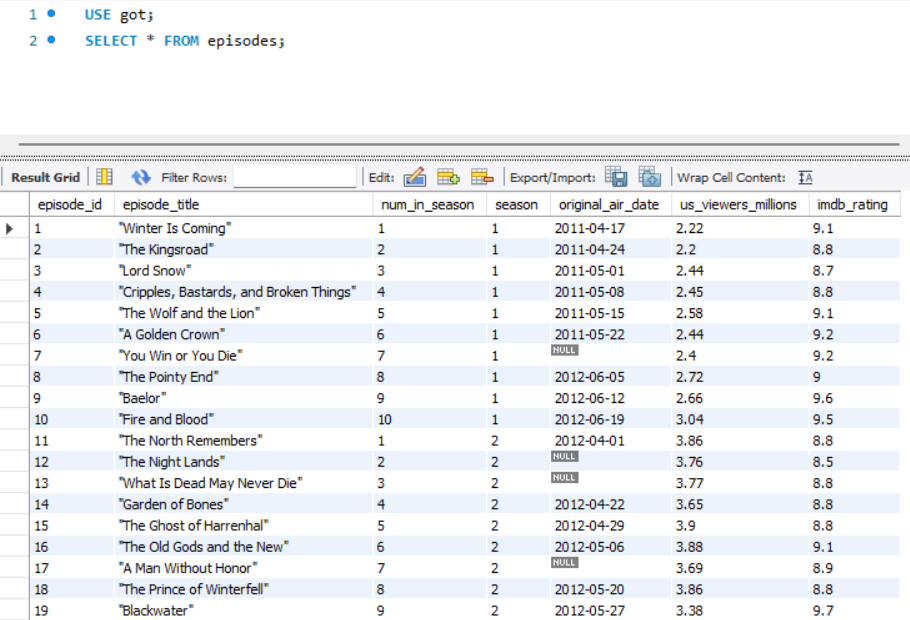

Сделаем пару запросов

In [7]:
mycursor = mydb.cursor()
mycursor.execute("SELECT episode_title FROM episodes WHERE num_in_season = 1 and original_air_date > '2013-04-17'")
print(mycursor.fetchall())

[('"Two Swords"',), ('"The Wars to Come"',), ('"The Red Woman"',)]


In [8]:
mycursor = mydb.cursor()
mycursor.execute("SELECT AVG(us_viewers_millions) FROM episodes WHERE season = 1")
print(mycursor.fetchall())

[(2.515000033378601,)]


По такой же логике создадим еще три таблицы.

Следующая таблица "книги и сезоны". К каждому сезону написана книга, по которой он был снят

In [6]:
# books
books = [((int(got['Season'][ind])), got['Novel(s) adapted'][ind]) for ind in got.index]
books = list(set(books)) # убираем дубликаты
books

[(1, 'A Game of Thrones'),
 (4, 'A Storm of Swords'),
 (7, 'Outline from A Dream of Spring and original content '),
 (8, 'Outline from A Dream of Spring and original content '),
 (5, 'A Feast for Crows, A Dance with Dragons and original content'),
 (3, 'A Storm of Swords'),
 (6, 'Outline from The Winds of Winter and original content '),
 (2, 'A Clash of Kings')]

In [ ]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()
mycursor.execute("""
CREATE TABLE books (
    season INT UNIQUE,
    book_title VARCHAR(255)
)
""")

In [8]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()
sql = "INSERT INTO books (season, book_title) VALUES (%s, %s)"

mycursor.executemany(sql, books)
mydb.commit()

Как это выглядит в WorkBench

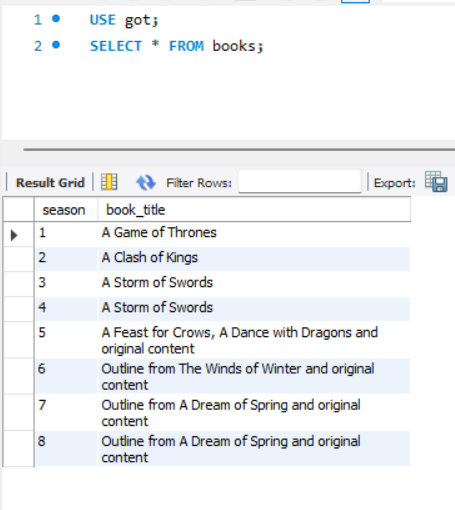

In [ ]:
# Попробуем получить данные из таблицы books
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()

mycursor.execute("SELECT book_title FROM books WHERE season > 5") # Что адаптировали после 5 сезона (ведь романов-то больше не было!)
result = mycursor.fetchall()
for row in result:
    print(row) 

('Outline from The Winds of Winter and original content ',)
('Outline from A Dream of Spring and original content ',)
('Outline from A Dream of Spring and original content ',)


Но у нас уже были сезоны в таблице episodes, можно индексировать книги по сезону

In [9]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()

mycursor.execute("ALTER TABLE episodes ADD FOREIGN KEY (season) REFERENCES books(season)")
mydb.commit()

При проверке в WorkBench, видно, что все индексировалось

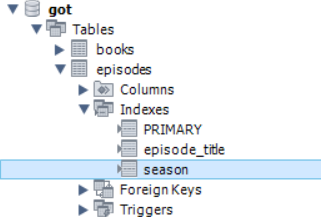

Еще пару запросов

In [ ]:
# Попробуем получить данные из таблицы episodes
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()
mycursor.execute("SELECT episode_title FROM episodes WHERE imdb_rating < 7 AND num_in_season < 5")
result = mycursor.fetchall()
for row in result:
    print(row)

('"The Last of the Starks"',)


In [16]:
# Проверим, так ли это
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()
mycursor.execute("SELECT imdb_rating, num_in_season FROM episodes WHERE episode_title = '\"The Last of the Starks\"'")
print(mycursor.fetchall())

[(5.4, 4)]


Создадим таблицу, где к каждой серии будет информация о ее режиссере и сценаристе

In [ ]:
people = [(int(got['No. overall'][ind]), got['Directed by'][ind], got['Written by'][ind]) for ind in got.index]

In [49]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()

mycursor.execute("""
CREATE TABLE directors_writers 
(
    episode INT,
    director VARCHAR(255),
    writer VARCHAR(255),
    FOREIGN KEY (episode) REFERENCES episodes(episode_id)
)
""")
mydb.commit()


In [50]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()
sql = "INSERT INTO directors_writers (episode, director, writer) VALUES (%s, %s, %s)"

mycursor.executemany(sql, people)
mydb.commit()

Как все выглядит

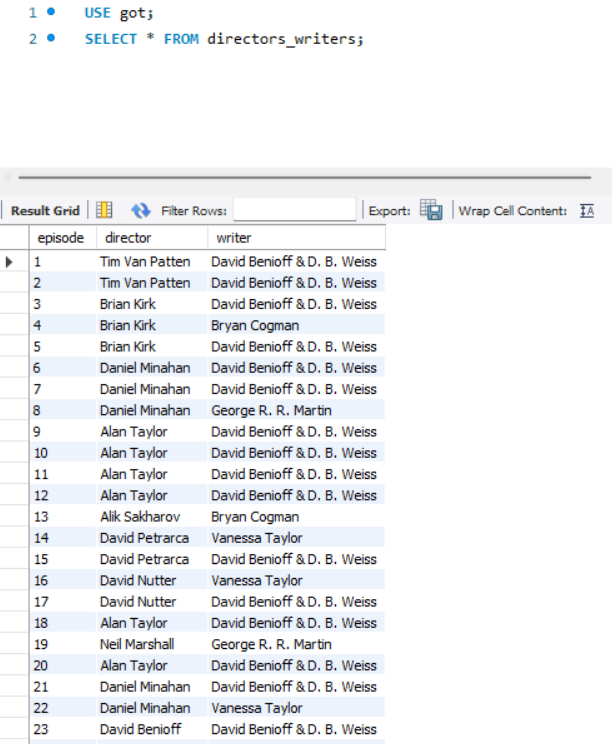

Попробуем написать вложенный запрос

In [11]:
mycursor = mydb.cursor()
mycursor.execute('''
SELECT director, writer FROM directors_writers
WHERE episode IN (
	SELECT episode_id FROM episodes
	GROUP BY episode_id
	HAVING AVG(imdb_rating) > 8.5
)    
''')

print(mycursor.fetchall())

[('Tim Van Patten', 'David Benioff & D. B. Weiss'), ('Tim Van Patten', 'David Benioff & D. B. Weiss'), ('Brian Kirk', 'David Benioff & D. B. Weiss'), ('Brian Kirk', 'Bryan Cogman'), ('Brian Kirk', 'David Benioff & D. B. Weiss'), ('Daniel Minahan', 'David Benioff & D. B. Weiss'), ('Daniel Minahan', 'David Benioff & D. B. Weiss'), ('Daniel Minahan', 'George R. R. Martin'), ('Alan Taylor', 'David Benioff & D. B. Weiss'), ('Alan Taylor', 'David Benioff & D. B. Weiss'), ('Alan Taylor', 'David Benioff & D. B. Weiss'), ('Alik Sakharov', 'Bryan Cogman'), ('David Petrarca', 'Vanessa Taylor'), ('David Petrarca', 'David Benioff & D. B. Weiss'), ('David Nutter', 'Vanessa Taylor'), ('David Nutter', 'David Benioff & D. B. Weiss'), ('Alan Taylor', 'David Benioff & D. B. Weiss'), ('Neil Marshall', 'George R. R. Martin'), ('Alan Taylor', 'David Benioff & D. B. Weiss'), ('Daniel Minahan', 'David Benioff & D. B. Weiss'), ('Daniel Minahan', 'Vanessa Taylor'), ('David Benioff', 'David Benioff & D. B. Weiss

Для лучшей читаемости, сделаем запрос по-другому

In [16]:
res = pd.read_sql_query('''
SELECT director, writer FROM directors_writers
WHERE episode IN (
	SELECT episode_id FROM episodes
	WHERE imdb_rating < 8
	GROUP BY episode_id
)            
''', mydb)
res

C:\Users\Anna\AppData\Local\Temp\ipykernel_11700\2903977115.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query('''


,director,writer
0,David Nutter,Dave Hill
1,David Nutter,Bryan Cogman
2,Miguel Sapochnik,David Benioff & D. B. Weiss
3,David Nutter,David Benioff & D. B. Weiss
4,Miguel Sapochnik,David Benioff & D. B. Weiss
5,David Benioff & D. B. Weiss,David Benioff & D. B. Weiss


Теперь посморим, как называется одна из этих серий

In [18]:
res = pd.read_sql_query('''
SELECT episode_title, imdb_rating FROM episodes
WHERE episode_id IN (
	SELECT episode FROM directors_writers
	WHERE director = 'David Benioff & D. B. Weiss' AND writer = 'David Benioff & D. B. Weiss'
)            
''', mydb)
res

C:\Users\Anna\AppData\Local\Temp\ipykernel_11700\2130217021.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query('''


,episode_title,imdb_rating
0,"""The Iron Throne""",4.0


"The Iron Throne" - это самая последняя серия с самым низким рейтингом за весь сериал

### Промежуточный этап
Сколько у нас уже есть таблиц

In [51]:
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES")

for table in mycursor:
  print(table)

('books',)
('directors_writers',)
('episodes',)


Теперь надо создать таблицу со статистическими данными

In [12]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()

mycursor.execute("""
CREATE TABLE statistics (
    season INT ,
    max_viewers FLOAT,
    min_viewers FLOAT,
    avg_viewers FLOAT,
    max_rating FLOAT,   
    min_rating FLOAT,
    avg_rating FLOAT,
    FOREIGN KEY (season) REFERENCES books(season)
)
""")
mydb.commit()

Это вложенный запрос показывает примерно то, какие значения должны быть в этой таблице 

In [11]:
mycursor.execute("""
SELECT 
    MAX(viewers) AS max_viewers,
    MIN(viewers) AS min_viewers,
    AVG(viewers) AS avg_viewers,
    MAX(rating) AS max_rating,
    MIN(rating) AS min_rating,
    AVG(rating) AS avg_rating
FROM (
    SELECT us_viewers_millions AS viewers,
    imdb_rating AS rating
    FROM episodes
    WHERE season = 1
) AS subquery 
""")
result = mycursor.fetchall()
for row in result:
    print(row)

(3.04, 2.2, 2.515000033378601, 9.6, 8.7, 9.100000095367431)


Заполним данные

In [13]:
mycursor.execute("""
INSERT INTO statistics (season, max_viewers, min_viewers, avg_viewers, max_rating, min_rating, avg_rating)
SELECT 
    season,
    MAX(us_viewers_millions) AS max_viewers,
    MIN(us_viewers_millions) AS min_viewers,
    AVG(us_viewers_millions) AS avg_viewers,
    MAX(imdb_rating) AS max_rating,
    MIN(imdb_rating) AS min_rating,
    AVG(imdb_rating) AS avg_rating
FROM episodes
GROUP BY season
""")
mydb.commit()

Теперь у нас есть все таблицы

In [2]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = getpass('Введите ваш пароль!'),
    database = 'got'
)
mycursor = mydb.cursor()

mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES")

for table in mycursor:
  print(table)

('books',)
('directors_writers',)
('episodes',)
('statistics',)


Как это выглядит в WorkBench

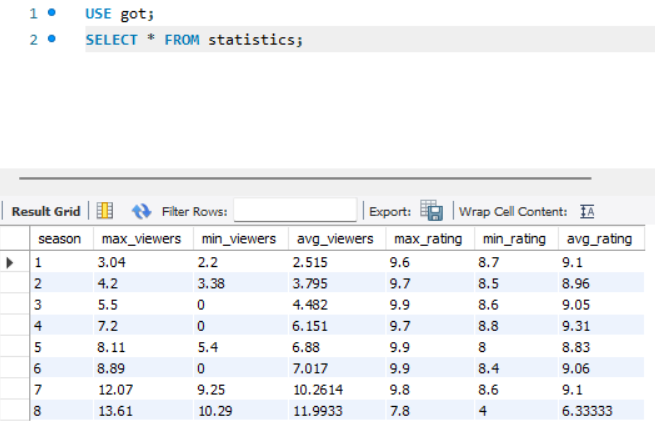

Запросим какую нибудь информацию

In [5]:
mycursor = mydb.cursor()
mycursor.execute('''
SELECT season FROM statistics
WHERE max_viewers > 10 AND max_rating < 8.5                
''')

print(mycursor.fetchall())

[(8,)]


In [6]:
mycursor = mydb.cursor()
mycursor.execute('''
SELECT avg_rating FROM statistics
WHERE min_viewers > 5       
''')

print(mycursor.fetchall())

[(8.83,), (9.1,), (6.33333,)]


### JOIN
Я решила сделать следующий sql запрос:

Соединить названия эпизодов, номер сезона и названия книг из таблиц episodes и books, так, чтобы высвечилались только эпизоды, оценка которых выше 8.5. 

In [ ]:
# Сделала так, чтобы было удобнее читать
res = pd.read_sql_query("""
SELECT 
    episodes.episode_title AS Episode,
    episodes.season AS Season,
    books.book_title AS Book
FROM 
    episodes
JOIN 
    books
ON 
    episodes.season = books.season
WHERE 
    episodes.imdb_rating > 8.5
ORDER BY 
    episodes.season, episodes.num_in_season
""", mydb)
res

C:\Users\Anna\AppData\Local\Temp\ipykernel_20160\1233084375.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("""


,Episode,Season,Book
0,"""Winter Is Coming""",1,A Game of Thrones
1,"""The Kingsroad""",1,A Game of Thrones
2,"""Lord Snow""",1,A Game of Thrones
3,"""Cripples, Bastards, and Broken Things""",1,A Game of Thrones
4,"""The Wolf and the Lion""",1,A Game of Thrones
5,"""A Golden Crown""",1,A Game of Thrones
6,"""You Win or You Die""",1,A Game of Thrones
7,"""The Pointy End""",1,A Game of Thrones
8,"""Baelor""",1,A Game of Thrones
9,"""Fire and Blood""",1,A Game of Thrones


Мы видим, что вошли все серии первого сезона (он и считается самым приближенным к книге), а вот восьмого сезона нет совсем. По отзывам зрителей, это самый худший сезон сериала